# Installation

## I don't know what you've installed or how you've installed it, so let's talk before you run any of this.

**OS X folks** can run the following:

* `brew install geos`
* `brew install gdal`
* `brew install spatialindex`
* `pip3 install pillow`
* `pip3 install pysal`
* `pip3 install geopandas`
* `pip3 install https://github.com/matplotlib/basemap/archive/v1.0.7rel.tar.gz`
* `pip3 install rtree`

For **Windows without Anaconda**, [use this guide](http://geoffboeing.com/2014/09/using-geopandas-windows/) to install through `pip` directly from `whl` files.

# Geopandas Usage

## Importing

You'll be importing

* pandas because you love it
* geopandas for geographic stuff
* `Point` from shapely to help convert CSV files into something geopandas can understand

and `%matplotlib inline` for viewing maps, of course.

In [91]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline

## Opening a shapefile

Let's open up the Community Districts data. **What kind of file is it?**

In [92]:
districts = gpd.read_file("Community Districts/districts.shp")

## Introduction to the GeoDataFrame

A GeoDataFrame is *just like a dataframe*, it just... has geographic stuff in it.

In [93]:
districts.head()

,boro_cd,geometry,shape_area,shape_leng
0,311.0,POLYGON ((-73.97299433938896 40.60881414180224...,1.031759e+08,51566.989006
1,412.0,"POLYGON ((-73.80168266553363 40.6663223525709,...",2.673336e+08,65933.851319
2,481.0,"POLYGON ((-73.83591564875908 40.7434308933925,...",4.750313e+07,53795.118705
3,314.0,POLYGON ((-73.95630035122711 40.65504828183116...,8.217567e+07,49291.791502
4,313.0,POLYGON ((-73.98372152615246 40.59582107821707...,8.814953e+07,65746.939737


In [94]:
districts[districts.boro_cd > 400]

,boro_cd,geometry,shape_area,shape_leng
1,412.0,"POLYGON ((-73.80168266553363 40.6663223525709,...",2.673336e+08,65933.851319
2,481.0,"POLYGON ((-73.83591564875908 40.7434308933925,...",4.750313e+07,53795.118705
11,484.0,(POLYGON ((-73.93177580884338 40.5578995623848...,1.237923e+08,247830.043391
12,402.0,"POLYGON ((-73.897923512633 40.75424000267809, ...",1.398945e+08,72182.746967
14,503.0,(POLYGON ((-74.13319580101383 40.5363067420505...,5.990016e+08,189072.053206
16,482.0,"POLYGON ((-73.835900721417 40.71164137076879, ...",2.429264e+07,32007.621257
20,407.0,(POLYGON ((-73.83970053362432 40.7652895884367...,3.283557e+08,139168.786464
26,414.0,(POLYGON ((-73.91192551909782 40.5658138623772...,1.957296e+08,211877.538189
28,410.0,(POLYGON ((-73.85722330984366 40.6502786705413...,1.716549e+08,105187.759482
31,409.0,POLYGON ((-73.81709738756452 40.70402980158765...,1.073240e+08,50763.105913


In [95]:
districts.head()

,boro_cd,geometry,shape_area,shape_leng
0,311.0,POLYGON ((-73.97299433938896 40.60881414180224...,1.031759e+08,51566.989006
1,412.0,"POLYGON ((-73.80168266553363 40.6663223525709,...",2.673336e+08,65933.851319
2,481.0,"POLYGON ((-73.83591564875908 40.7434308933925,...",4.750313e+07,53795.118705
3,314.0,POLYGON ((-73.95630035122711 40.65504828183116...,8.217567e+07,49291.791502
4,313.0,POLYGON ((-73.98372152615246 40.59582107821707...,8.814953e+07,65746.939737


## Visualizing a shapefile

You can just use `.plot()` to visualize a GeoDataFrame, it's nice and easy.

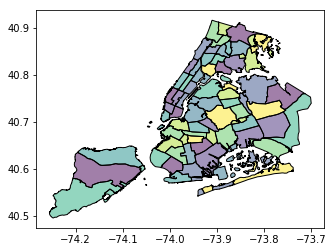

In [96]:
districts.plot()

## Changing the CRS (Coordinate Reference System)

### WAY ONE: Just changing the Projection

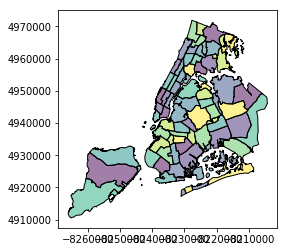

In [97]:
# Go into the crs to convert it...
# ignore the datum and spheroid,
# just change the PROJECTION to MERCATOR
districts.to_crs({'proj': 'merc'}).plot()

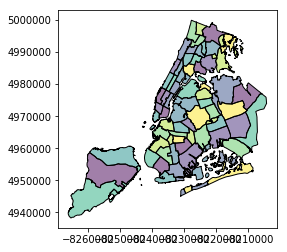

In [98]:
# Give it the SECRET CODE from the PETROLEUM GROUP
# (which you can try to find by googling)
# (or hopefully you have a list because they're
# all very confusingly/similarly named)
districts.to_crs(epsg=3857).plot()

## Opening a CSV of points

geopandas doesn't understand a CSV file of lat/lon points, so you need to convert each line into shapely geometry, then feed that into a new geo dataframe.

Once you do that, you need to set the `crs` to `{'init': 'epsg:4326'}` so it knows what kind of datum/sphereoid/projection you're measuring from.

**Let's try opening the earthquakes CSV**

In [99]:
df = pd.read_csv("earthquakes_1.0_day.csv")
df.head(2)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2017-05-03T01:58:56.924Z,59.804800,-136.833500,0.0,3.10,ml,NaN,NaN,NaN,0.59,...,2017-05-03T02:03:56.653Z,"94km WNW of Skagway, Alaska",earthquake,NaN,0.3,NaN,NaN,automatic,ak,ak
1,2017-05-03T01:35:24.350Z,39.398167,-120.255501,5.6,2.42,md,21.0,73.0,0.1314,0.05,...,2017-05-03T01:57:52.525Z,"10km NW of Truckee, California",earthquake,0.21,1.0,0.26,19.0,automatic,nc,nc


In [100]:
def make_point(row):
    return Point(row.longitude, row.latitude)

# Go through every row, and make a point out of its lat and lon
points = df.apply(make_point, axis=1)

# Make a new GeoDataFrame
# using the data from our old df
# but also adding in the geometry we just made
earthquakes = gpd.GeoDataFrame(df, geometry=points)

# It doesn't come with a CRS because it's a CSV, so let's
# say "hey, let's use the standard shape of the earth etc"
earthquakes.crs = {'init': 'epsg:4326'}

# Let's look at the first few
earthquakes.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,geometry
0,2017-05-03T01:58:56.924Z,59.804800,-136.833500,0.00,3.10,ml,NaN,NaN,NaN,0.59,...,"94km WNW of Skagway, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak,POINT (-136.8335 59.8048)
1,2017-05-03T01:35:24.350Z,39.398167,-120.255501,5.60,2.42,md,21.0,73.0,0.131400,0.05,...,"10km NW of Truckee, California",earthquake,0.21,1.00,0.26,19.0,automatic,nc,nc,POINT (-120.2555008 39.3981667)
2,2017-05-03T01:26:38.608Z,59.897000,-136.710900,0.00,2.00,ml,NaN,NaN,NaN,0.82,...,"92km WNW of Skagway, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak,POINT (-136.7109 59.897)
3,2017-05-03T01:24:02.260Z,37.246834,-121.635498,2.98,2.57,md,58.0,43.0,0.032380,0.07,...,"13km N of Morgan Hill, California",earthquake,0.14,0.34,0.09,63.0,automatic,nc,nc,POINT (-121.635498 37.2468338)
4,2017-05-03T01:18:05.540Z,38.830166,-122.808166,1.75,1.11,md,17.0,74.0,0.006923,0.02,...,"7km W of Cobb, California",earthquake,0.27,0.40,0.08,4.0,automatic,nc,nc,POINT (-122.8081665 38.8301659)


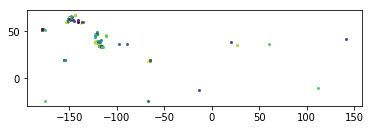

In [101]:
earthquakes.plot()

In [102]:
earthquakes.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
geometry            object
dtype: object

In [103]:
# Read in the CSV
df = pd.read_csv("earthquakes_1.0_day.csv")

points = df.apply(lambda row: Point(row.longitude, row.latitude), axis=1)
earthquakes = gpd.GeoDataFrame(df, geometry=points)
earthquakes.crs = {'init': 'epsg:4326'}

# If you want to know how this all works, look above
earthquakes.head(2)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,geometry
0,2017-05-03T01:58:56.924Z,59.804800,-136.833500,0.0,3.10,ml,NaN,NaN,NaN,0.59,...,"94km WNW of Skagway, Alaska",earthquake,NaN,0.3,NaN,NaN,automatic,ak,ak,POINT (-136.8335 59.8048)
1,2017-05-03T01:35:24.350Z,39.398167,-120.255501,5.6,2.42,md,21.0,73.0,0.1314,0.05,...,"10km NW of Truckee, California",earthquake,0.21,1.0,0.26,19.0,automatic,nc,nc,POINT (-120.2555008 39.3981667)


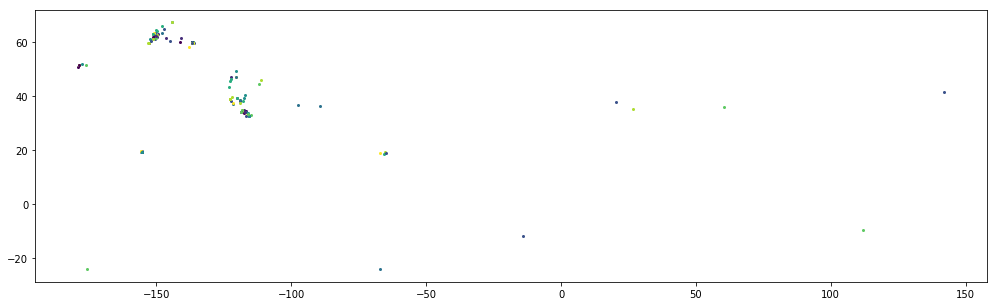

In [104]:
earthquakes.plot(figsize=(20,5))

## Using the built-in map

(-197.99999999999997,
 198.00000000000014,
 -98.682256500000037,
 92.327386500000017)

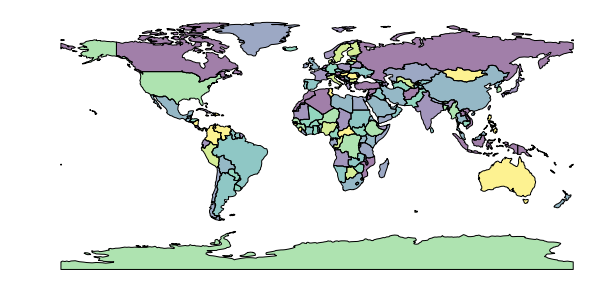

In [105]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20,5))
ax.axis('off')

In [106]:
world.crs

{'init': 'epsg:4326'}

# Styling your visuals

## Setting size, line and shape colors, widths, axes

* `linewidth`
* `color`
* `edgecolor`
* `ax.axis`

Let's plot the community districts!

(-197.99999999999997,
 198.00000000000014,
 -98.682256500000037,
 92.327386500000017)

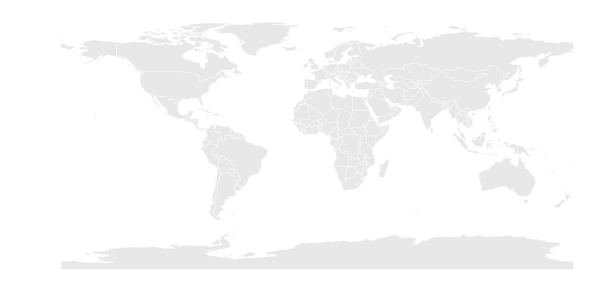

In [107]:
ax = world.plot(figsize=(20,5), linewidth=0.25, edgecolor='white', color='lightgrey')
ax.axis('off')

Let's plot the world!

(-8269186.9760319712,
 -8201155.1235175692,
 4935220.9945818782,
 5002970.2511551529)

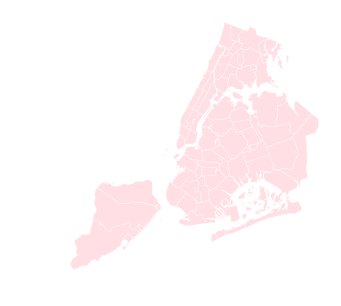

In [108]:
ax = districts.to_crs(epsg=3857).plot(figsize=(20,5), linewidth=0.25, edgecolor='white', color='pink')
ax.axis('off')

## Setting the projection

You can use `to_crs` to convert to different projections. In typical pandas fashion, you can do it a lot of ways, but the easiest is to send a `epsg=` and feed it the correct EPSG code.

You'll also probably want to do an `ax.axis('off')` to turn off the splines and axes!

What are the EPSG codes for some common projections?

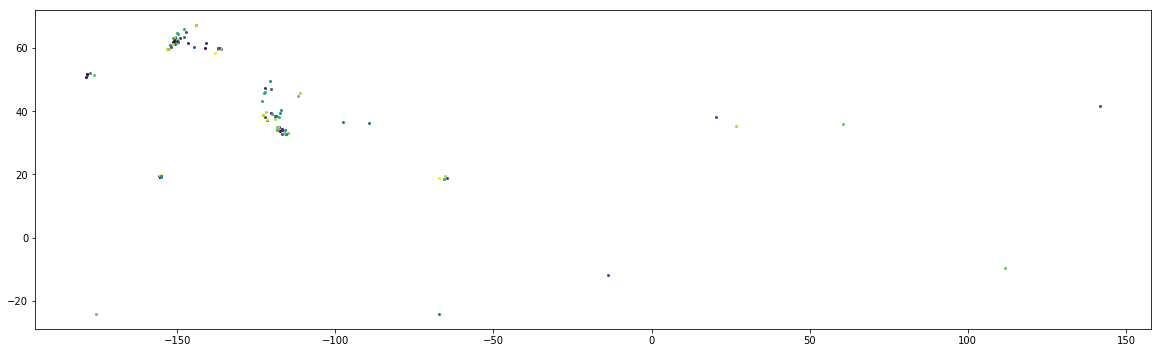

In [109]:
earthquakes.plot(figsize=(20,7))

## Styling markers

* markersize
* color
* alpha

(-194.91405, 157.99564999999998, -28.824189999999998, 71.926789999999997)

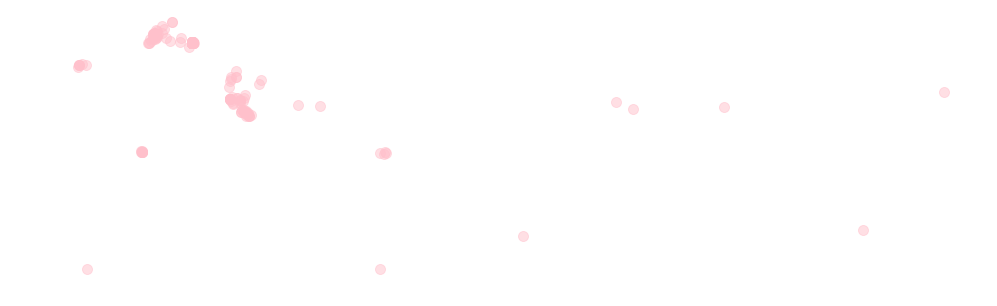

In [110]:
# Plot the earthquakes:
# BIGGER CIRCLES
# all one color
# make them a little transparent
# NO AXES OR BORDERS AROUND THE MAP!!!!!!!

ax = earthquakes.plot(figsize=(20,5), markersize=10, color='pink', alpha=0.5)
ax.axis('off')

(-197.99999999999997,
 198.00000000000014,
 -98.682256500000037,
 92.327386500000017)

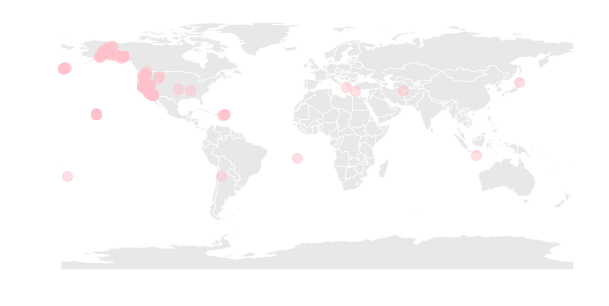

In [111]:
# Plot the earthquakes:
# BIGGER CIRCLES
# all one color
# make them a little transparent
# NO AXES OR BORDERS AROUND THE MAP!!!!!!!

# Save the first layer as ax
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
# Pass ax=ax to the second layer
earthquakes.plot(markersize=10, color='pink', alpha=0.5, ax=ax)
ax.axis('off')

# Colormaps/ramps

## Auto colormap

Giving your `plot` a `column` and a `cmap` will colorize your values. You can try `plasma` as your color map, or check out [more here](https://matplotlib.org/examples/color/colormaps_reference.html).

In [112]:
earthquakes.head(2)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,geometry
0,2017-05-03T01:58:56.924Z,59.804800,-136.833500,0.0,3.10,ml,NaN,NaN,NaN,0.59,...,"94km WNW of Skagway, Alaska",earthquake,NaN,0.3,NaN,NaN,automatic,ak,ak,POINT (-136.8335 59.8048)
1,2017-05-03T01:35:24.350Z,39.398167,-120.255501,5.6,2.42,md,21.0,73.0,0.1314,0.05,...,"10km NW of Truckee, California",earthquake,0.21,1.0,0.26,19.0,automatic,nc,nc,POINT (-120.2555008 39.3981667)


(-197.99999999999997,
 198.00000000000014,
 -98.682256500000037,
 92.327386500000017)

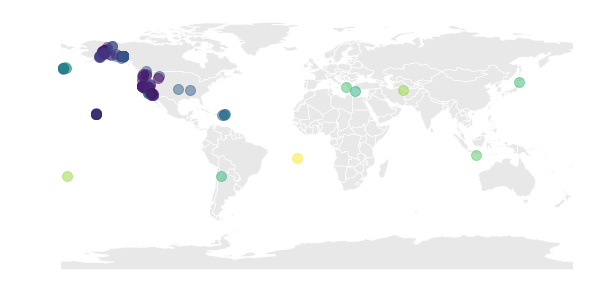

In [113]:
# Plot the earthquakes:
# BIGGER CIRCLES
# all one color
# make them a little transparent
# NO AXES OR BORDERS AROUND THE MAP!!!!!!!

# Save the first layer as ax
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
# Pass ax=ax to the second layer
earthquakes.plot(markersize=10, alpha=0.5, ax=ax, column='mag')
ax.axis('off')

(-197.99999999999997,
 198.00000000000014,
 -98.682256500000037,
 92.327386500000017)

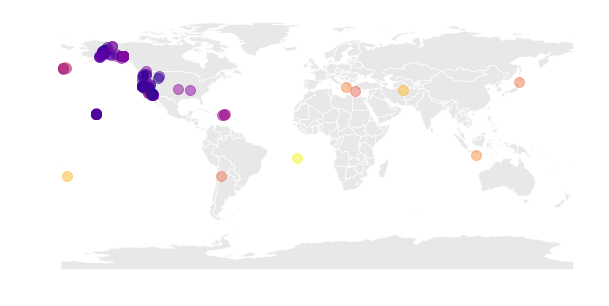

In [114]:
# Plot the earthquakes:
# BIGGER CIRCLES
# all one color
# make them a little transparent
# NO AXES OR BORDERS AROUND THE MAP!!!!!!!

# Save the first layer as ax
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
# Pass ax=ax to the second layer
earthquakes.plot(markersize=10, alpha=0.5, ax=ax, column='mag', cmap='plasma')
ax.axis('off')

In [115]:
world.head(2)

,continent,gdp_md_est,geometry,iso_a3,name,pop_est
0,Asia,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG,Afghanistan,28400000.0
1,Africa,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,AGO,Angola,12799293.0


## Auto colormap again

We can also try with the world. What's the `gdp_md_est` column looking like?

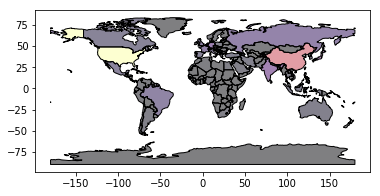

In [116]:
world.plot(column='gdp_md_est', cmap='inferno')

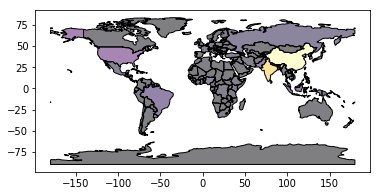

In [117]:
world.plot(column='pop_est', cmap='inferno')

## Plotting multiple layers of data

Let's try plotting the earthquakes on top of the world. **Save your first plot as `ax` and send it to the next one as `ax=ax`.**

# Setting the projection by `proj` with named projections

Instead of using an EPSG code, you can also set the projection with `to_crs` by  `.to_crs({'proj': 'merc'})` or something similar.

I don't recommend this method, but it is a little friendlier than EPSG codes.

### Plot the world with the default projection

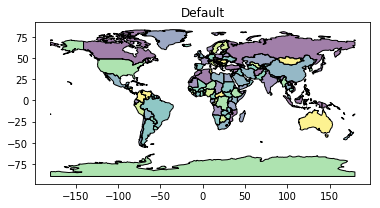

In [118]:
ax = world.plot()
ax.set_title("Default")

### Plot the world with Mercator (merc)

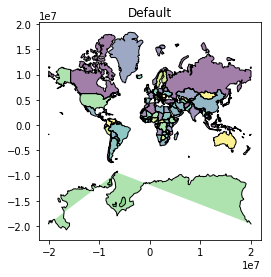

In [119]:
ax = world.to_crs({'proj': 'merc'}).plot()
ax.set_title("Default")

### Plot the world with [Transverse Mercator](https://en.wikipedia.org/wiki/Transverse_Mercator_projection) (tmerc)

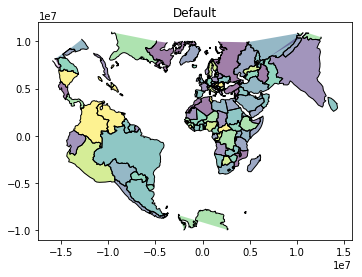

In [120]:
ax = world.to_crs({'proj': 'tmerc'}).plot()
ax.set_title("Default")

### Plot the world with Albers Equal Area (aea)

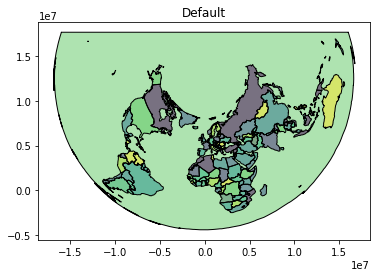

In [121]:
ax = world.to_crs({'proj': 'aea'}).plot()
ax.set_title("Default")

# Spatial join

# Dataset 1: States

Let's import the states and clean them up a little bit. we need to clean the data up a little

In [122]:
# Read in the shapefile from cb_2016_us_state_500k as "states"
states = gpd.read_file("cb_2016_us_state_500k/cb_2016_us_state_500k.shp")

In [123]:
# Get rid of Guam, Mariana Islands and Virgin Islands
states = states[states.STATEFP.astype(int) < 60]
# Get rid of Hawaii and Alaska
states = states[~states.NAME.isin(['Hawaii', 'Alaska'])]
states.tail(5)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
48,0400000US47,106797662267,2355188876,47,00,Tennessee,47,01325873,TN,"POLYGON ((-90.31029799999999 35.004295, -90.30..."
49,0400000US48,676633459408,19025991684,48,00,Texas,48,01779801,TX,"(POLYGON ((-94.718296 29.728855, -94.717207 29..."
50,0400000US51,102257320053,8528605825,51,00,Virginia,51,01779803,VA,"(POLYGON ((-75.742406 37.80835, -75.741512 37...."
51,0400000US53,172113416541,12558451099,53,00,Washington,53,01779804,WA,"(POLYGON ((-122.33164 48.020556, -122.328343 4..."
52,0400000US55,140273604537,29361386480,55,00,Wisconsin,55,01779806,WI,"(POLYGON ((-86.95616699999999 45.355489, -86.9..."


## Dataset 2: Waffle House

Read in `wafflehouses.csv`, and convert it to a GeoDataFrame.

In [124]:
# Read in the CSV
df = pd.read_csv("wafflehouses.csv")

points = df.apply(lambda row: Point(row.long, row.lat), axis=1)
wafflehouses = gpd.GeoDataFrame(df, geometry=points)
wafflehouses.crs = {'init': 'epsg:4326'}

# If you want to know how this all works, look above
wafflehouses.head(2)

,location,lat,long,score,geometry
0,"Waffle House-Duluth,GA",33.991269,-84.153232,8,POINT (-84.15323199999999 33.991269)
1,"Waffle House-Biloxi,MS",30.393627,-88.942691,3,POINT (-88.942691 30.393627)


### Plot the locations, coloring based on the 'score' column.

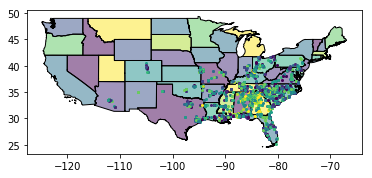

In [125]:
ax = states.plot()
wafflehouses.plot(column='score', ax=ax)

# The actual spatial join

### Is the CRS of the states the same as the CRS of the Waffle House locations?

In [126]:
states.crs

{'init': 'epsg:4269'}

In [127]:
wafflehouses.crs

{'init': 'epsg:4326'}

### If not, we'll force them to match using `.to_crs`

In [128]:
# Convert CRS to match
converted_states = states.to_crs(wafflehouses.crs)
converted_states.head(2)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."


In [129]:
converted_states.crs

{'init': 'epsg:4326'}

In [130]:
wafflehouses.crs

{'init': 'epsg:4326'}

### And now we can join

Open up Terminal and run

* pip install rtree
* brew install spatialindex

In [131]:
wafflehouses.head()

,location,lat,long,score,geometry
0,"Waffle House-Duluth,GA",33.991269,-84.153232,8,POINT (-84.15323199999999 33.991269)
1,"Waffle House-Biloxi,MS",30.393627,-88.942691,3,POINT (-88.942691 30.393627)
2,"Waffle House-Pearl,MS",32.269078,-90.135180,3,POINT (-90.13518000000001 32.269078)
3,"Waffle House-Memphis,TN",35.155903,-89.885466,2,POINT (-89.88546600000001 35.155903)
4,"Waffle House-Lumberton,TX",30.242025,-94.195967,2,POINT (-94.19596700000001 30.242025)


In [132]:
converted_states.head(2)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."


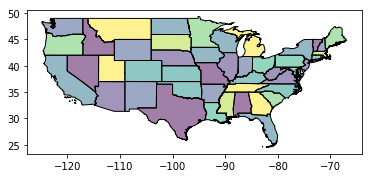

In [133]:
converted_states.plot()

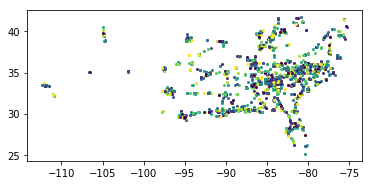

In [134]:
wafflehouses.plot()

In [136]:
# http://geopandas.org/mergingdata.html
wafflehouses_with_state_data = gpd.sjoin(wafflehouses, converted_states, how='left', op='within')
wafflehouses_with_state_data.head()

,location,lat,long,score,geometry,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
0,"Waffle House-Duluth,GA",33.991269,-84.153232,8,POINT (-84.15323199999999 33.991269),9,0400000US13,1.491698e+11,4.741101e+09,13,00,Georgia,13,01705317,GA
1,"Waffle House-Biloxi,MS",30.393627,-88.942691,3,POINT (-88.942691 30.393627),18,0400000US28,1.215299e+11,3.930506e+09,28,00,Mississippi,28,01779790,MS
2,"Waffle House-Pearl,MS",32.269078,-90.135180,3,POINT (-90.13518000000001 32.269078),18,0400000US28,1.215299e+11,3.930506e+09,28,00,Mississippi,28,01779790,MS
3,"Waffle House-Memphis,TN",35.155903,-89.885466,2,POINT (-89.88546600000001 35.155903),48,0400000US47,1.067977e+11,2.355189e+09,47,00,Tennessee,47,01325873,TN
4,"Waffle House-Lumberton,TX",30.242025,-94.195967,2,POINT (-94.19596700000001 30.242025),49,0400000US48,6.766335e+11,1.902599e+10,48,00,Texas,48,01779801,TX


In [137]:
wafflehouses_with_state_data['NAME'].value_counts()

Georgia           416
North Carolina    165
South Carolina    163
Florida           152
Alabama           147
Tennessee         114
Texas             104
Mississippi        87
Louisiana          79
Ohio               72
Kentucky           63
Virginia           50
Arkansas           45
Missouri           40
Indiana            24
Arizona            17
Oklahoma           16
Maryland           11
Pennsylvania       11
Colorado           10
Kansas              5
West Virginia       4
Delaware            3
New Mexico          2
Illinois            2
Name: NAME, dtype: int64

## Doing things with spatially joined data

* What column do we use for color?
* Add a legend with `legend=True`
* Something is going to go wrong, though!

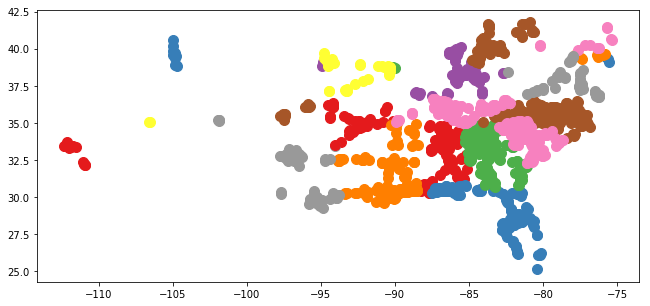

In [138]:
# Need dropna because some wafflehouses are missing states
wafflehouses_with_state_data.dropna().plot(column='NAME', markersize=10, figsize=(20,5))

## What if we reverse the spatial join and make it 'contains'?

How is this different than what we did before?

In [139]:
# http://geopandas.org/mergingdata.html
states_with_wafflehouse_data = gpd.sjoin(converted_states, wafflehouses, how='left', op='contains')
states_with_wafflehouse_data.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,index_right,location,lat,long,score
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",149,"Waffle House-Tuscaloosa,AL",33.127149,-87.549124,5.0
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",33,"Waffle House-Calera,AL",33.147916,-86.749224,6.0
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",148,"Waffle House-Tuscaloosa,AL",33.165991,-87.551787,7.0
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",147,"Waffle House-Tuscaloosa,AL",33.176447,-87.470757,10.0
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",146,"Waffle House-Tuscaloosa,AL",33.177825,-87.524648,8.0


In [140]:
states_with_wafflehouse_data.shape

(1826, 15)

In [141]:
select_columns = states_with_wafflehouse_data[['NAME', 'geometry', 'score']]
select_columns.head()

,NAME,geometry,score
0,Alabama,"(POLYGON ((-88.053375 30.506987, -88.051087999...",5.0
0,Alabama,"(POLYGON ((-88.053375 30.506987, -88.051087999...",6.0
0,Alabama,"(POLYGON ((-88.053375 30.506987, -88.051087999...",7.0
0,Alabama,"(POLYGON ((-88.053375 30.506987, -88.051087999...",10.0
0,Alabama,"(POLYGON ((-88.053375 30.506987, -88.051087999...",8.0


## Aggregating with `.dissolve` (the geographic version of 'groupby')

http://geopandas.org/aggregation_with_dissolve.html

### In theory we'd run the following line

But it doesn't work because we have too much data, and `.dissolve` isn't smart enough to deal with it.

In [142]:
# We can't do this, I think because there are too many wafflehouses
#wafflehouse_counts = states_with_wafflehouse_data.dissolve(by='NAME', aggfunc='count')
#wafflehouse_counts.head()

### But we can try it out with the first 5/20/50 of them

In [143]:
%%time
select_columns.head(5).dissolve(by='NAME', aggfunc='count')

CPU times: user 340 ms, sys: 4.48 ms, total: 344 ms
Wall time: 350 ms


,geometry,score
NAME,,
Alabama,"(POLYGON ((-88.053375 30.506987, -88.051087999...",5


In [144]:
%%time
select_columns.head(20).dissolve(by='NAME', aggfunc='count')

CPU times: user 1.52 s, sys: 6.33 ms, total: 1.53 s
Wall time: 1.53 s


,geometry,score
NAME,,
Alabama,"(POLYGON ((-88.053375 30.506987, -88.051087999...",20


In [145]:
%%time
select_columns.head(50).dissolve(by='NAME', aggfunc='count')

CPU times: user 4.2 s, sys: 32 ms, total: 4.24 s
Wall time: 4.29 s


,geometry,score
NAME,,
Alabama,"(POLYGON ((-88.053375 30.506987, -88.051087999...",50


In [146]:
%%time
select_columns.head(200).dissolve(by='NAME', aggfunc='count')

CPU times: user 15.8 s, sys: 49.6 ms, total: 15.9 s
Wall time: 16 s


,geometry,score
NAME,,
Alabama,"(POLYGON ((-88.053375 30.506987, -88.051087999...",147
Arizona,"POLYGON ((-114.816294 32.508038, -114.814321 3...",17
Arkansas,"POLYGON ((-94.6178329666013 36.4994141203285, ...",36


## Spatial joins for LARGE data sets (NOT using dissolve)

Instead of using `.dissolve`, we need to use `.contains` to say "find me all of the waffle houses inside of this one specific state". I don't know why this works better, but it does. We'll use `.sum()` to count the number inside, but you could also do something like `['score'].mean()` etc.

### First, let's try it with one state

In [147]:
states.head(2)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."


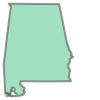

In [148]:
states.loc[0].geometry

In [149]:
# False = 0
# True = 1
# Count the number of states where the name contains "New"
states.NAME.str.contains("New").sum()

4

In [150]:
# Give me the first state!
state = states.loc[0]
# Look at the wafflehouses...
# are they inside of the state's geometry?
wafflehouses.within(state.geometry).sum()

147

In [151]:
# So for our first state, there were 147 inside of there

### Now, let's try it with every state

In [152]:
# You can use .contains
# counts the true ones
states['wafflehouse_count'] = states.apply(lambda state: wafflehouses.within(state.geometry).sum(), axis=1)
states.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,wafflehouse_count
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",147
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",17
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",45
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",0
5,0400000US08,268429343790,1175112870,08,00,Colorado,08,01779779,CO,"POLYGON ((-109.060253 38.599328, -109.059541 3...",10


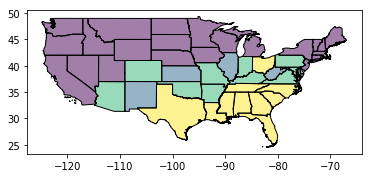

In [153]:
states.plot(column='wafflehouse_count', scheme='quantiles')

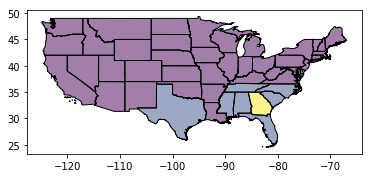

In [154]:
states.plot(column='wafflehouse_count', scheme='equal_interval')

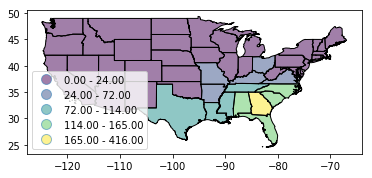

In [155]:
states.plot(column='wafflehouse_count', scheme='fisher_jenks', legend=True)

## Spatial joins for SMALLER data sets (YES using dissolve)

If our dataset isn't that big, though, we're fine to use `.dissolve`.

In [156]:
# Each one is a country
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(10)

,continent,gdp_md_est,geometry,iso_a3,name,pop_est
0,Asia,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG,Afghanistan,28400000.0
1,Africa,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,AGO,Angola,12799293.0
2,Europe,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",ALB,Albania,3639453.0
3,Asia,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",ARE,United Arab Emirates,4798491.0
4,South America,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,ARG,Argentina,40913584.0
5,Asia,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,...",ARM,Armenia,2967004.0
6,Antarctica,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...,ATA,Antarctica,3802.0
7,Seven seas (open ocean),16.0,"POLYGON ((68.935 -48.62500000000001, 69.58 -48...",ATF,Fr. S. Antarctic Lands,140.0
8,Oceania,800200.0,(POLYGON ((145.3979781434948 -40.7925485166058...,AUS,Australia,21262641.0
9,Europe,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,...",AUT,Austria,8210281.0


See how every country has a continent? We can `.dissolve` to group them together based on continent. It's like groupby, really!

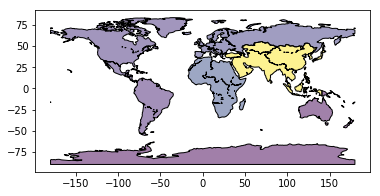

In [157]:
# But we'll dissolve them so it's only continents
continents = world.dissolve(by='continent', aggfunc='sum')
continents.head()
continents.plot(column='pop_est')

# Saving the results

You want to look at this stuff in Leaflet, right? For that we'll need to save. Geopandas supports practically _every_ file format you could ever want.

In [158]:
wafflehouses_with_state_data.to_file("wafflehouses.json", driver='GeoJSON')